Coefficient (slope): [-29.594544]
Intercept: 695.8741432929733


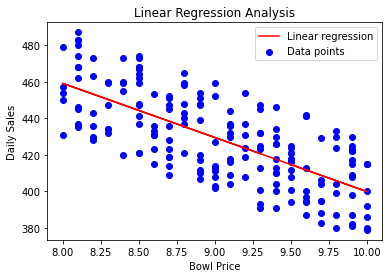

In [2]:
import pandas as pd
from sklearn.linear_model import LinearRegression

# Load the data
df = pd.read_excel("Maospalace.xlsx")

# Select loan term as the dependent variable and requested loan amount as the independent variable
X = df[["Bowl Price"]]
y = df["Daily Sales"]

# Train the Linear Regression model
model = LinearRegression()
model.fit(X, y)

# Interpret the results
print("Coefficient (slope):", model.coef_)
print("Intercept:", model.intercept_)
import matplotlib.pyplot as plt

# Plot the data points
plt.scatter(X, y, color='blue', label='Data points')

# Plot the linear regression line
plt.plot(X, model.predict(X), color='red', label='Linear regression')

plt.xlabel('Bowl Price')
plt.ylabel('Daily Sales')
plt.title('Linear Regression Analysis')
plt.legend()
plt.show()


Accuracy: 0.788135593220339


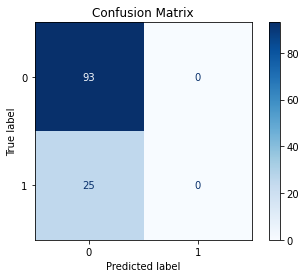

In [6]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load the data
df = pd.read_excel("RFMdata.xlsx")

# Select features and target variable
X = df[['R', 'F', 'M']]
y = df['Respond']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

# Plot the confusion matrix
plot_confusion_matrix(model, X_test, y_test, cmap=plt.cm.Blues, values_format='.0f')
plt.title('Confusion Matrix')
plt.show()

C:\Users\User\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


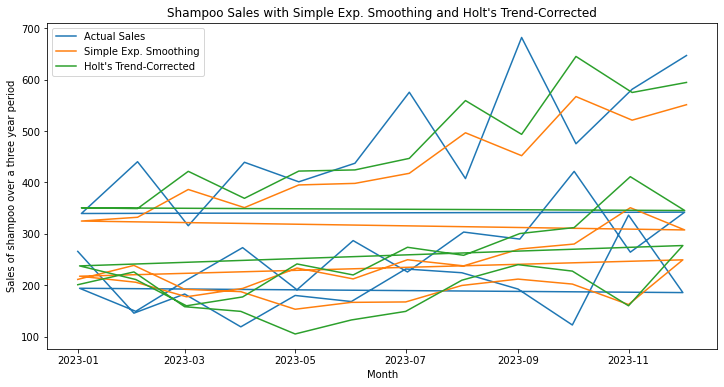

The data shows a trend.


In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, Holt

# Load the dataset
df = pd.read_excel('shampoo_sales.xlsx')

# Simple Exponential Smoothing
model_ses = SimpleExpSmoothing(df['Sales of shampoo over a three year period'])
fit_ses = model_ses.fit(smoothing_level=0.5)
df['SES'] = fit_ses.fittedvalues

# Holt's Trend-Corrected
model_holt = Holt(df['Sales of shampoo over a three year period'])
fit_holt = model_holt.fit(smoothing_level=0.5, smoothing_trend=0.5)
df['Holt'] = fit_holt.fittedvalues

# Plot the original data, Simple Exponential Smoothing, and Holt's Trend-Corrected
plt.figure(figsize=(12, 6))
plt.plot(df['Month'], df['Sales of shampoo over a three year period'], label='Actual Sales')
plt.plot(df['Month'], df['SES'], label='Simple Exp. Smoothing')
plt.plot(df['Month'], df['Holt'], label="Holt's Trend-Corrected")
plt.legend()
plt.title('Shampoo Sales with Simple Exp. Smoothing and Holt\'s Trend-Corrected')
plt.xlabel('Month')
plt.ylabel('Sales of shampoo over a three year period')
plt.show()

# Check if there is a trend in the data
trend_ses = fit_ses.params['smoothing_trend']
trend_holt = fit_holt.params['smoothing_trend']

if trend_ses > 0 or trend_holt > 0:
    print("The data shows a trend.")
else:
    print("The data does not show a trend.")

Forecasted revenue for the next quarter:
100    18928.267097
dtype: float64


C:\Users\User\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\User\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
C:\Users\User\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


KeyError: 0

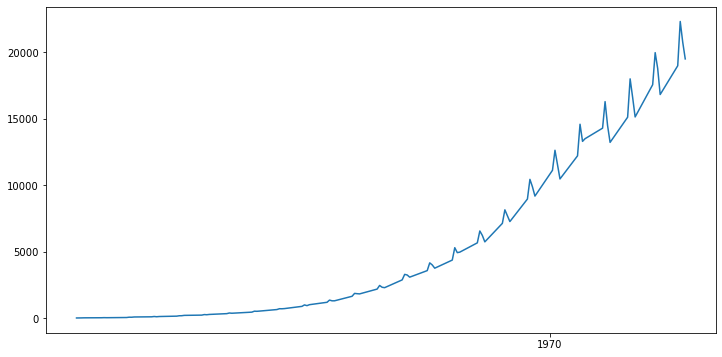

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

# Load the dataset
df = pd.read_excel('Home Depot Quarterly.xlsx')

# Preprocess the dataset
df['Quarter'] = pd.to_datetime(df['Year and Quarter'])
df.set_index('Quarter', inplace=True)

# Simple Exponential Smoothing
model_ses = SimpleExpSmoothing(df['Homedepot sales'])
fit_ses = model_ses.fit(smoothing_level=0.2)  # You can adjust the smoothing level as needed
forecast = fit_ses.forecast(steps=1)

# Forecast one-quarter-ahead revenue
print("Forecasted revenue for the next quarter:")
print(forecast)

# Plot the original data and the forecasted values
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Homedepot sales'], label='Actual Revenue')
plt.plot(pd.date_range(start=df.index[-1], periods=2, freq='Q'), [df['Homedepot sales'].iloc[-1], forecast[0]], linestyle='--', marker='o', label='Forecasted Revenue')
plt.legend()
plt.title('Home Depot Quarterly Revenue Forecast with Simple Exp. Smoothing')
plt.xlabel('Year and Quarter')
plt.ylabel('Homedepot sales')
plt.show()
